# 1/ Open the Dataset

In [7]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

# Display basic information about the datasets
print(train_df.info())
print(test_df.info())
print(sample_submission_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

# 2/ Exploratory Data Analysis

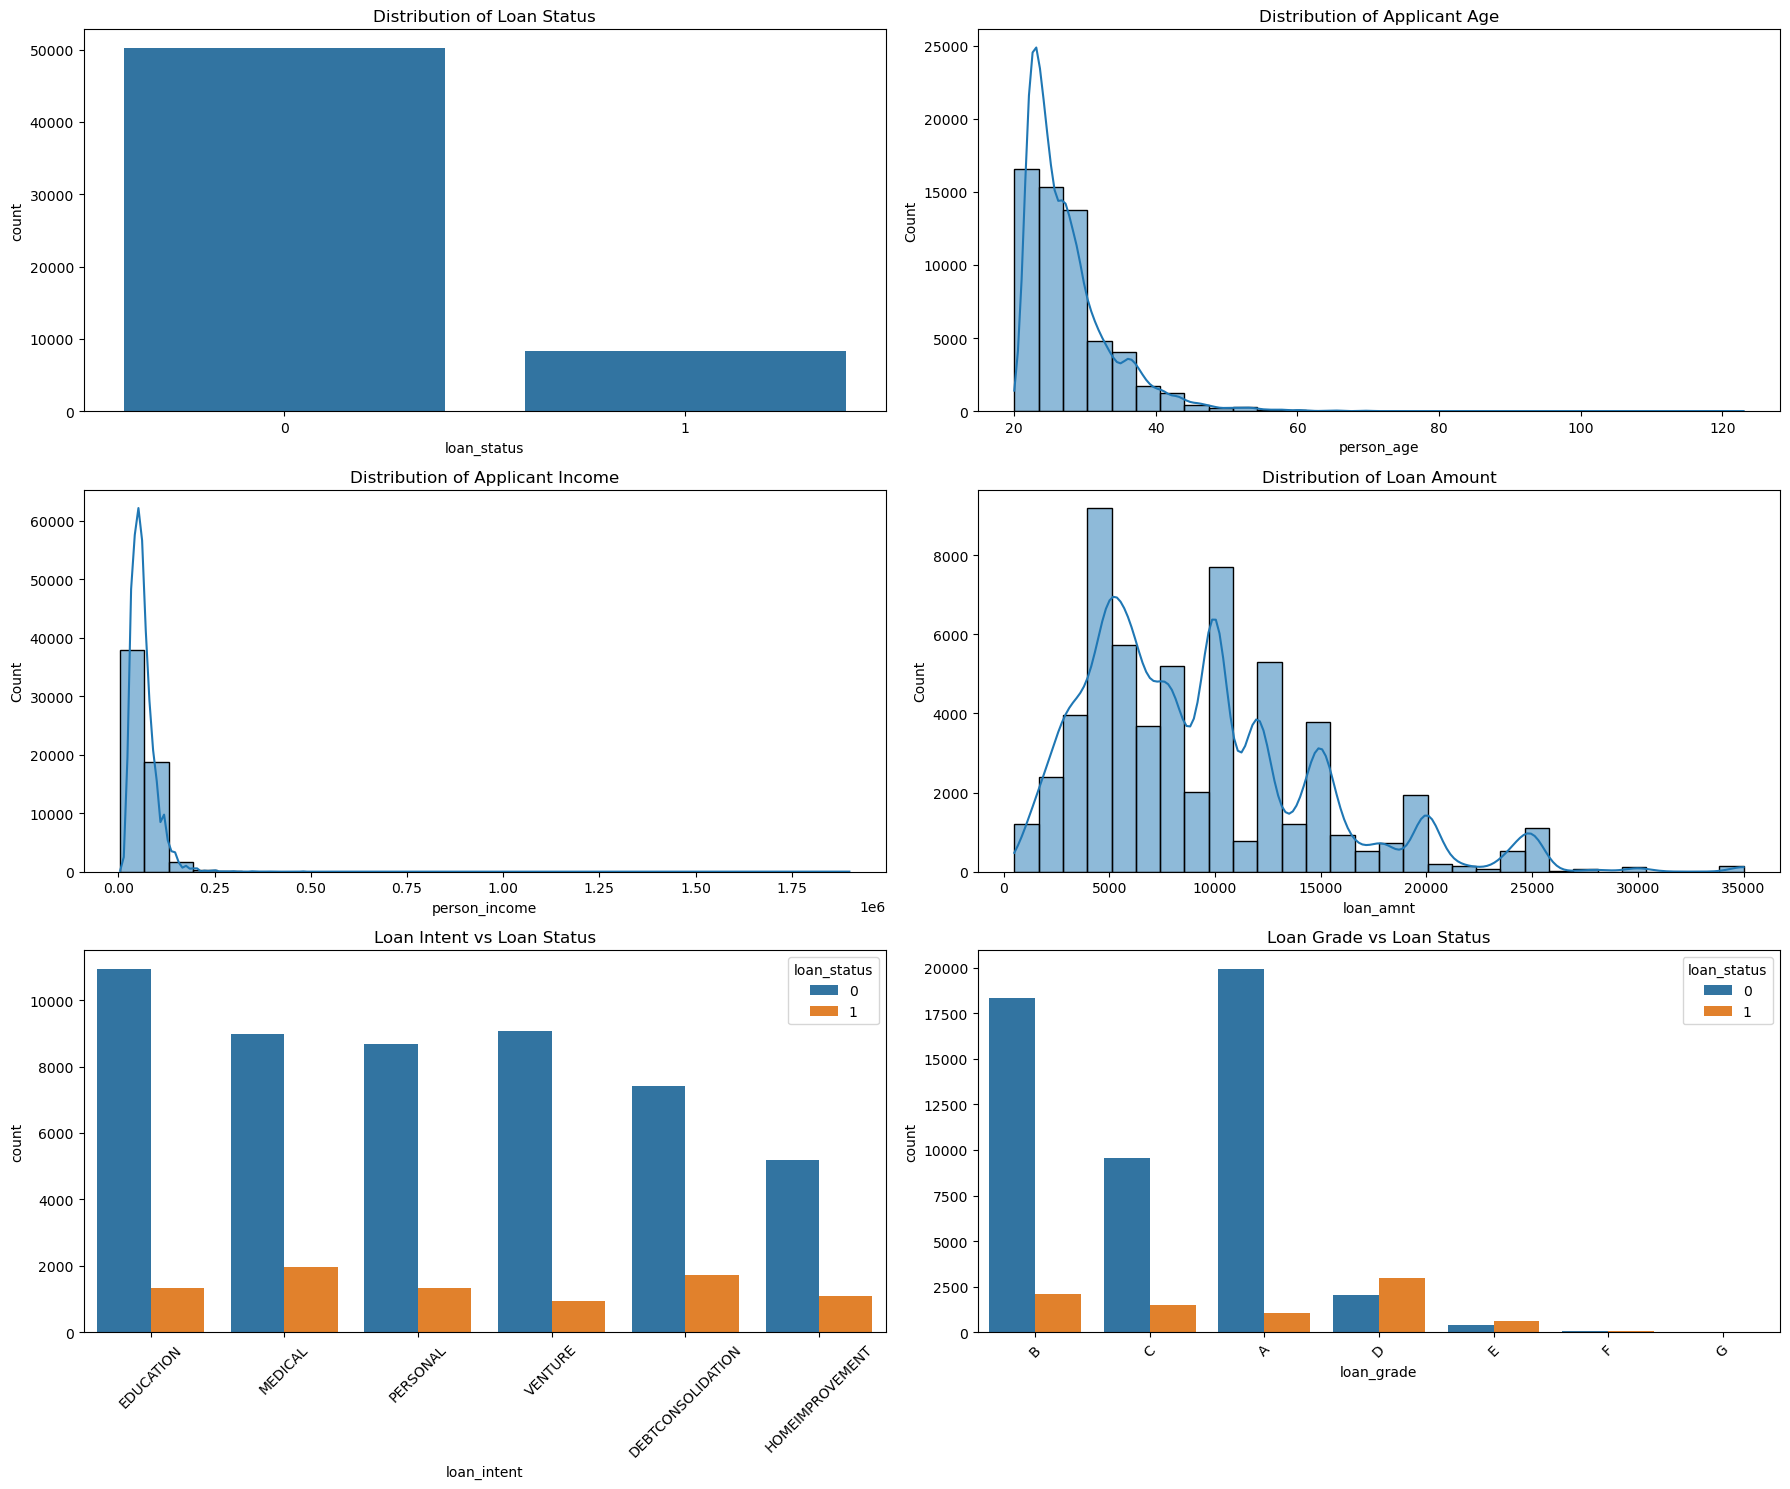

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(18, 15))

# Distribution of the target variable (loan_status)
plt.subplot(3, 2, 1)
sns.countplot(x='loan_status', data=train_df)
plt.title('Distribution of Loan Status')

# Age distribution
plt.subplot(3, 2, 2)
sns.histplot(train_df['person_age'], kde=True, bins=30)
plt.title('Distribution of Applicant Age')

# Income distribution
plt.subplot(3, 2, 3)
sns.histplot(train_df['person_income'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')

# Loan amount distribution
plt.subplot(3, 2, 4)
sns.histplot(train_df['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')

# Loan intent vs. Loan status (increased figure size and rotated labels)
plt.subplot(3, 2, 5)
sns.countplot(x='loan_intent', hue='loan_status', data=train_df)
plt.title('Loan Intent vs Loan Status')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Loan grade vs. Loan status
plt.subplot(3, 2, 6)
sns.countplot(x='loan_grade', hue='loan_status', data=train_df)
plt.title('Loan Grade vs Loan Status')
plt.xticks(rotation=45)  # Rotate x-axis labels here as well for better readability
train_df['loan_grade'] = pd.Categorical(train_df['loan_grade'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)

plt.tight_layout()
plt.show()


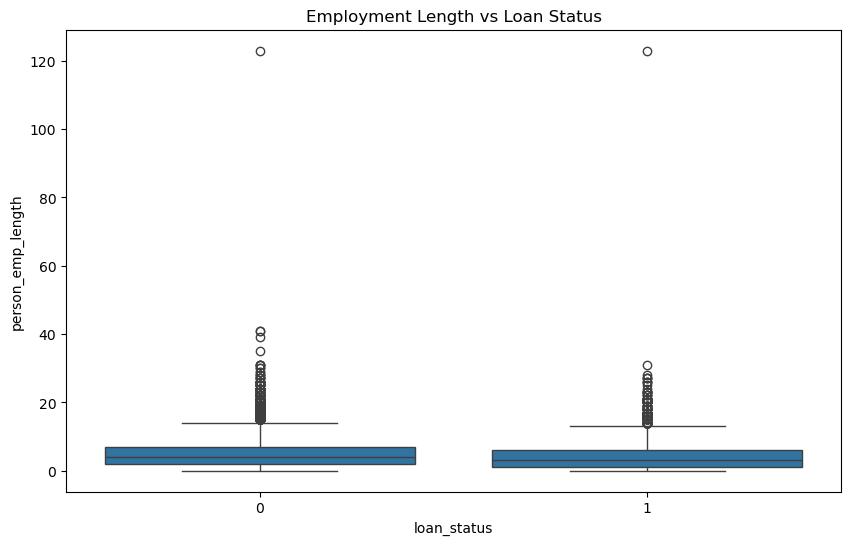

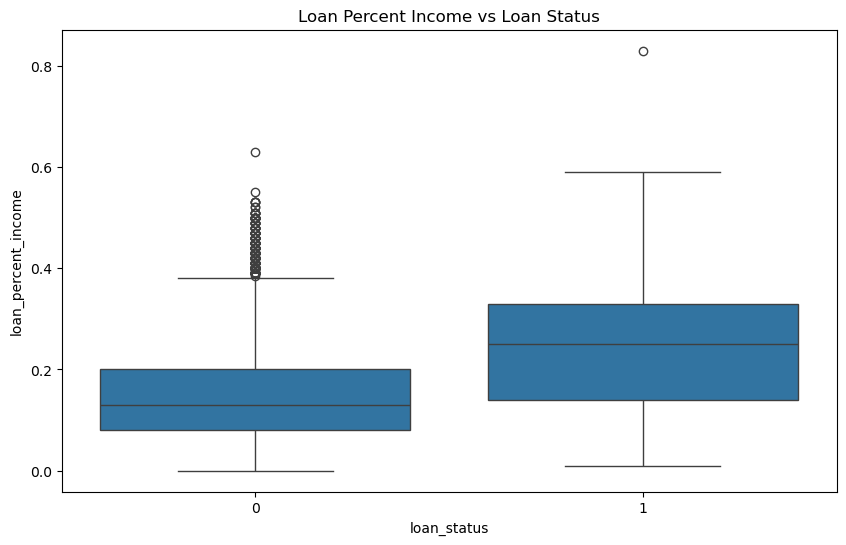

In [9]:
# Visualize the relationship between employment length and loan status using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_emp_length', data=train_df)
plt.title('Employment Length vs Loan Status')
plt.show()

# Visualize the relationship between loan percent income and loan status using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=train_df)
plt.title('Loan Percent Income vs Loan Status')
plt.show()


# 3/ Baseline Machine Learning (Logistic Regression)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Preprocessing: Encoding categorical features and scaling numerical features
label_encoder = LabelEncoder()

# Encode categorical features in both train and test datasets
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

# Features and target
X = train_df.drop(columns=['id', 'loan_status'])
y = train_df['loan_status']

# Train-test split from the training dataset for model validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Baseline model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = log_reg.predict_proba(X_val_scaled)[:, 1]

# Evaluate baseline model using ROC AUC
baseline_auc = roc_auc_score(y_val, y_val_pred)
print(f'Baseline ROC AUC: {baseline_auc}')


Baseline ROC AUC: 0.8801397392019517


# 4/ Iterate / Experiment Tracking

In [11]:
# Initialize a results list to track experiments
results = []

# Example of tracking Logistic Regression baseline result
results.append({
    'model': 'Logistic Regression',
    'auc_score': baseline_auc
})

# Output the results after each iteration
for res in results:
    print(f"Model: {res['model']}, ROC AUC: {res['auc_score']}")


Model: Logistic Regression, ROC AUC: 0.8801397392019517
